## Acceleromter Dataset Classification using K-Nearest Neighbors with Dimension Reduction

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 3D K-Nearest Neighbor

In [2]:
df = pd.read_csv("../accelerometer.csv")

features = df[["pctid", "x", "y", "z"]].values
target = df["wconfid"].values

feature_names = ["pctid", "x", "y", "z"]
target_names = ["normal", "perpendicular", "opposite"]

pca = PCA(n_components=3)
features = pca.fit(features).transform(features)

feature_names = feature_names
target = target
target_names = target_names

print(features.shape)

(153000, 3)


train size :  122400  / test size :  30600

Training set score: 0.971846
Test set score: 0.580523
Training Time : 0.3382 sec


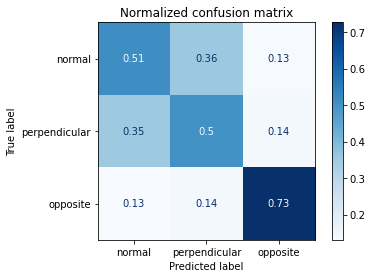

In [3]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

start = time.perf_counter()

knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

## 2D K-Nearest Neighbor

In [4]:
pca = PCA(n_components=2)
features = pca.fit(features).transform(features)

feature_names = feature_names
target = target
target_names = target_names

print(features.shape)

(153000, 2)


train size :  122400  / test size :  30600

Training set score: 0.972026
Test set score: 0.496438
Training Time : 0.3275 sec


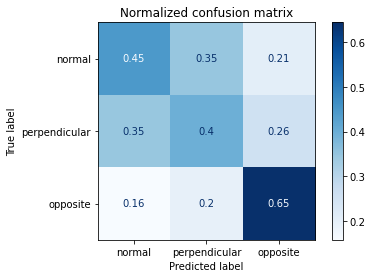

In [5]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

start = time.perf_counter()

knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

## Nearest Centroid Classifier

train size :  122400  / test size :  30600

Training set score: 0.338047
Test set score: 0.335588
Training Time : 0.0040 sec


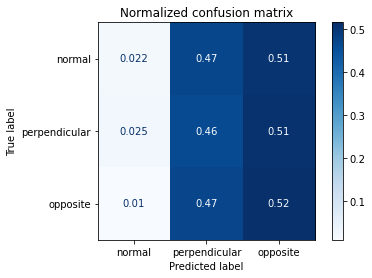

In [6]:
features = df[["pctid", "x", "y", "z"]].values
target = df["wconfid"].values

feature_names = ["pctid", "x", "y", "z"]
target_names = ["normal", "perpendicular", "opposite"]

seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()